## Ajuste de regressão utilizando scipy 

Suponha que você tenha uma dispersão de pontos, e que através de uma hipótese, supõe que esses pontos são o resultado do comportamento de uma determinada função matemática.

No caso: uma função :

$$ f(x) = a_{1}e^{a_{2}{x}} $$


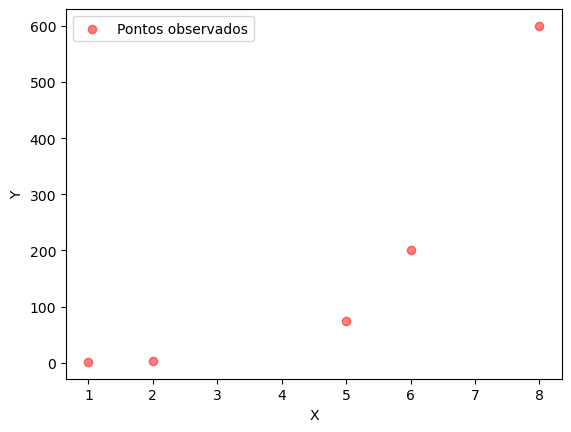

In [8]:
import numpy as np

x =np.array([1, 2 ,5, 6 , 8])

y = np.array([1.3 , 3.8 , 75 , 200, 600])

import matplotlib.pyplot as plt

plt.scatter(x, y , color = 'red' , label = 'Pontos observados', alpha=0.5)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()






## Scipy Optmize 

O Scipy tem um módulo para ajuste de curvas, para isso, precisamos definir como função a função matemática a ser fitada.

Vamos aplicar como exemplo:



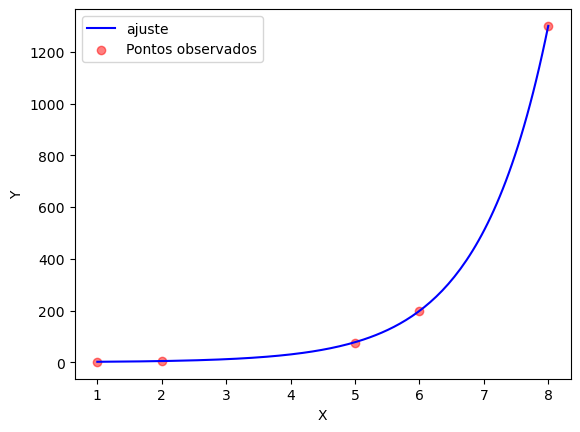

In [9]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt


### pontos experimentais
x =np.array([1, 2 ,5, 6 , 8])
y = np.array([1.3 , 3.8 , 75 , 200, 1300])


## funcao a ser ajustada

def f(x, a1 , a2 ):
    return np.exp(a2*x) * a1

# ajuste: 

a, Va = spo.curve_fit(f, x , y)

## cálculo da curva ajustada

N = 150
 
x_calc = np.linspace(x.min(), x.max(), N)
y_calc = f(x_calc , *a)

plt.figure()
plt.plot(x_calc, y_calc , '-', label = 'ajuste', color = 'blue')
plt.scatter(x, y , color = 'red' , label = 'Pontos observados', alpha=0.5)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()




In [10]:
texto = f'''parâmetros observados : 
          a1 = {a[0]}
          a2 = {a[1]} 
         '''
print(texto)

parâmetros observados : 
          a1 = 0.7057244009484122
          a2 = 0.9398392393680173 
         


### Outro exemplo

A Função anterior pode ser linearizada, então usar o método de mínimos quadrados poderia ser integrado facilmente, por outro lado o scipy pode ainda ser muito mais útil quando utilizado para funções não linearizáveis;

Ajuste para função: 

$$ g_{a}(x) = a_{1} + a_{2} sin(a_{3} x) $$

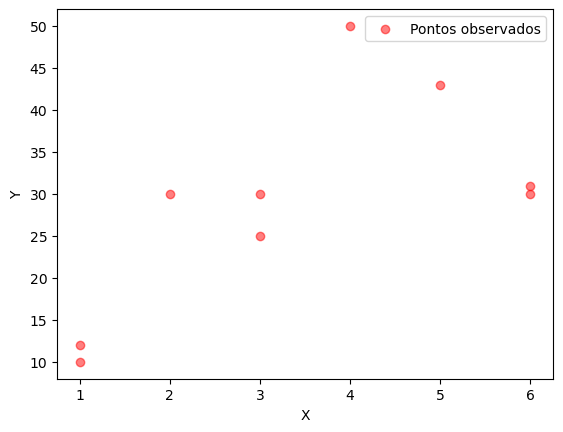

In [11]:
x = np.array([1, 1 , 2 , 3 , 3 , 4 ,5 ,6, 6 ])

y = np.array([10 , 12 , 30 , 25 , 30 , 50 , 43, 30 , 31 ])

plt.scatter(x, y , color = 'red' , label = 'Pontos observados', alpha=0.5)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()


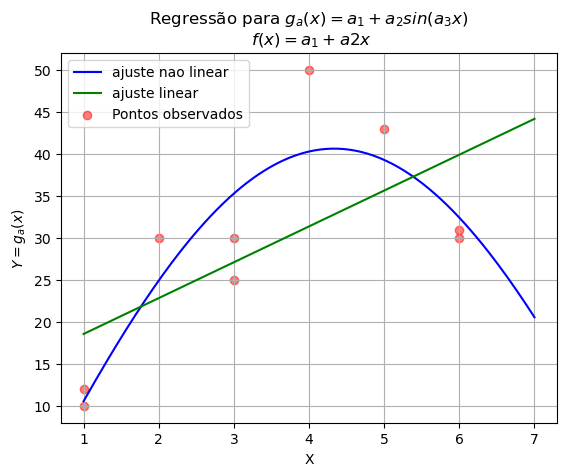

In [12]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt


x = np.array([1, 1 , 2 , 3 , 3 , 4 ,5 ,6, 6 ])

y = np.array([10 , 12 , 30 , 25 , 30 , 50 , 43, 30 , 31 ])


## funcao a ser ajustada

def f1(x, a1 , a2, a3 ):
    return a2* np.sin(a3*x) + a1

def f2(x, a1 , a2):
    return a1 + a2*x 


# ajuste: 

a, Va = spo.curve_fit(f1, x , y)

b, Vb = spo.curve_fit(f2, x , y)



## cálculo da curva ajustada

N = 150
 
x1_calc = np.linspace(x.min(), x.max() + 1, N)
y1_calc = f1(x1_calc , *a)

x2_calc = np.linspace(x.min(), x.max() + 1, N)
y2_calc = f2(x2_calc , *b)

plt.figure()
plt.plot(x1_calc, y1_calc , '-', label = 'ajuste nao linear', color = 'blue')
plt.plot(x2_calc, y2_calc , '-', label = 'ajuste linear ', color = 'green')

plt.scatter(x, y , color = 'red' , label = 'Pontos observados', alpha=0.5)
plt.ylabel('$Y = g_{a}(x)$')
plt.title('Regressão para $g_{a}(x) = a_{1} + a_{2} sin(a_{3} x) $\n $f(x) = a_{1} + a{2}x$')
plt.grid()
plt.xlabel('X')
plt.legend()
plt.savefig('Ajuste_fit.jpeg', dpi = 600)
plt.show()

